# First let's import, then look for the assignment below

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 3760 (delta 128), reused 123 (delta 66), pack-reused 3573
Receiving objects: 100% (3760/3760), 6.60 MiB | 22.51 MiB/s, done.
Resolving deltas: 100% (2427/2427), done.
You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp

# Assignment-2 Problem-2,3,4: Construct as requested

## 2 graded by SV; 3 by AR; 4 by LT

### BEFORE YOU SUBMIT THIS FILE, PLEASE RENAME THIS FILE BY REPLACING THE 0000000 IN THE FILE NAME WITH YOUR CORRECT UNID. KEEP THE "u" AT THE BEGINNING.

# Problem-2 graded by SV

<font size="4">    
1. Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that accepts an even number of *non-overlapping occurrences* of  $010$s. Thoroughly document your construction!
    
HERE ARE EXAMPLES :

* 01010 - does NOT have an even number of 0's because we wanted NON-OVERLAPPING

* 0101010 - has two NON-OVERLAPPING occurrences of 010 -- that is what we want!

* 0101111010 - has two NON-OVERLAPPING occurrences of 010

* 111111 - has ZERO occurrences of 010
    
</font>

### Approach: We will name states to remember the essence of the history of inputs so far. If you do so, and also keep the sense of where the machine is (in an I state, an IF state or an F state), then you'll have the solution fall out automatically!

Please read the Jove_User_Manual and the advice given there regarding how to write your automaton markdowns, how to place comments, how to group the lines of a DFA per state, and how to order which transition you may first consider.


In [3]:
Even010 = md2mc('''
DFA 

!! Put comments describing overall plan here
!! Making a DFA for the pattern of an even number of the pattern '010'
!! with no-overlaps i.e. 010010 works whereas 01010 does not

 IF : 1 -> IF   !! Doesn't progess pattern, but technically follows even number of '010' pattern
 IF : 0 -> S0   !! Starts the pattern
 
 S0 : 1 -> S01  !! Continues pattern
 S0 : 0 -> S0   !! 'restarts' pattern

 S01 : 1 -> IF     !! Breaks pattern, full reset
 S01 : 0 -> S010  !! Finishes pattern once

 S010 : 1 -> S010   !! Secondary initial, waiting for another pattern
 S010 : 0 -> S20    !! Secondary start of pattern

 S20 : 1 -> S201  !! Continues second pattern
 S20 : 0 -> S20   !! 'restarts' second pattern

 S201 : 1 -> S010   !! Breaks second pattern, reset to second pattern
 S201 : 0 -> IF     !! Ends second pattern
 
''')

Generating LALR tables


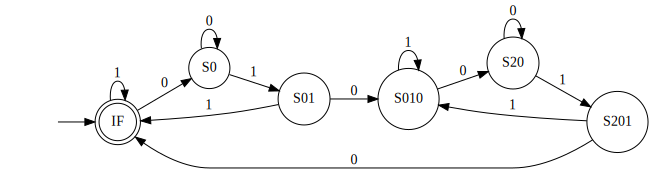

In [4]:
dotObj_dfa(Even010)

# Problem-3 graded by AR

<font size="4">    
3. Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that ends in a $010$, calling it Ends010. Then obtain the intersection with the Even010 machine using intersect_dfa. 
    
    Call the intersection Even010_Ends010.
    
    Next, minimize Even010_Ends010, storing it in min_Even010_Ends010 .
    
    Again, document the construction thoroughly.
    
</font>

### Approach: We will define a machine for "ends $010$" as illustrated in SV's part, and negate.

In [5]:
Ends010 =  md2mc('''
DFA

!! DFA that ends in '010' pattern

I : 1 -> I    !! Doesn't affect anything
I : 0 -> S0   !! Starts the pattern

S0 : 1 -> S01 !! Continues the pattern
S0 : 0 -> S0  !! 'restarts' the pattern

S01 : 1 -> I  !! breaks the pattern and restarts
S01 : 0 -> F  !! Ends the pattern and should end the sequence

F : 1 -> I    !! breaks the pattern and restarts
F : 0 -> S0   !! starts a new pattern to look for

''')

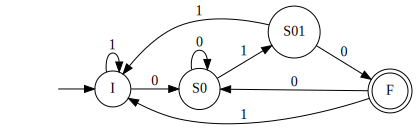

In [6]:
# Let's see the "Ends010" machine
dotObj_dfa(Ends010, FuseEdges=True)

## Obtain the intersection of Even010 and Ends010

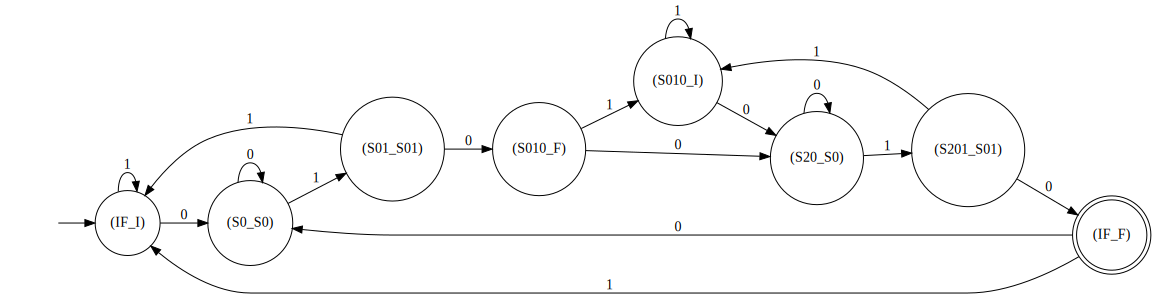

In [7]:
Even010_Ends010 = intersect_dfa(Even010, Ends010)
dotObj_dfa(Even010_Ends010)

## Minimize the intersection of Even010 and Ends010

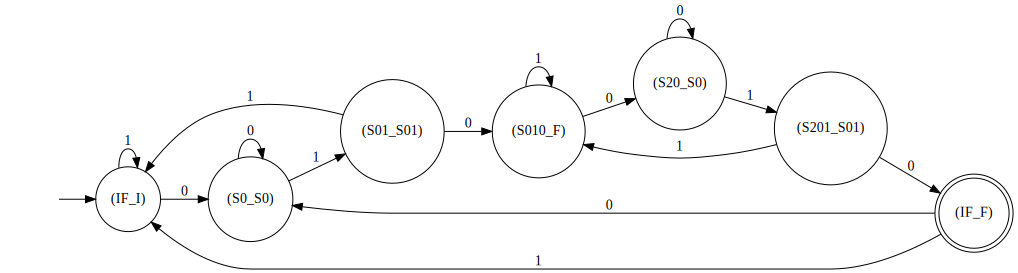

In [8]:
min_Even010_Ends010 = min_dfa(Even010_Ends010)
dotObj_dfa(min_Even010_Ends010)

# Problem-4 graded by LT

<font size="4">    
    
4.  Find out which states were eliminated in the Minimization Process. Explain why it was OK to leave these states out. Test the constructed machine using the template given to you. Finally use the Python "filter" function that filters out the accepted strings.
    
</font>

## Find out which states were eliminated

In [ ]:
# Hint: You can obtain the components of a DFA D by using the notation D["Q"] where
# D is a DFA created using the md2mc command. Basically, "D" is a dictionary and 
# D["Q"] obtains the value of the key at "Q". See the lecture slides for Lec-3.

From what I can tell the only state that was cut was (S010_I) since its components can just be split into other states while maintaining the definitions

## Explain why it is OK to leave these states out

A template to guide your answer is below.

<font size="4"> 
... Your explanations here - a template of your answer is as follows ...
    
**This template tries to limit the number of cases you have to list**
 
 
 * I find that state SOMESTATE1 is present in DFA1 but SOMESTATE1 is absent in DFA2 
 
 
   - I can obtain this info by doing DFA1["Q"] - DFA2["Q"]
   - I can also eye-ball the diagrams and spot the missing state
   - But I recall that in the diagram, a state may show up P_Q while in the DFA1["Q"] - DFA2["Q"] printout, it may show up as ('P','Q')
 
 
 
 * If there are multiple *SOMESTATE1* that are missing in DFA2, please pick the one that involves state letter 'I'  and call that the *SOMESTATE1* for the remaining questions BELOW
 
 
 **IMPORTANT CHANGE:** __Due to some non-reproducibility lurking in Jove, some people may not get a state containing "I". In that case, pick any one state that is missing, and answer the remaining questions.__
 
 * But I find that THIS STRING (pick the shortest string in numeric order) that reached SOMESTATE1 in DFA1 is now reaching state SOMESTATE2 in DFA2
 
 * Thus I conclude that state SOMESTATE1 and SOMESTATE2 are equivalent
 
 * This is further confirmed by the fact that (**here I am limiting your checks to 3 cases**)
   - upon 0, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
   - upon 1, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
   upon 01, SOMESTATE1 goes to THIS STATE while SOMESTATE2 goes to THIS STATE and they are  BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)
 
 

 
 
    
</font>

# Testing the machine

In [9]:
help(nthnumeric)

Help on function nthnumeric in module jove.LangDef:

nthnumeric(N, S=['a', 'b'])
    Assume S ('Sigma') is a 2-sized list of chars (default ['a','b']). 
    Produce the Nth string in numeric order, where N >= 0.
    Idea : Given N, get b = floor(log_2(N+1)) - need that 
    many places; what to fill in the places is the binary 
    code for N - (2^b - 1) with 0 as S[0] and 1 as S[1].



## Test the constructed machine the "direct" way

In [14]:
TestList = [ nthnumeric(i, ['0','1']) for i in range(256) ]
TestList2 = [ nthnumeric(i, ['0', '1']) for i in range(512)]

In [15]:
TestList

['',
 '0',
 '1',
 '00',
 '01',
 '10',
 '11',
 '000',
 '001',
 '010',
 '011',
 '100',
 '101',
 '110',
 '111',
 '0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111',
 '00000',
 '00001',
 '00010',
 '00011',
 '00100',
 '00101',
 '00110',
 '00111',
 '01000',
 '01001',
 '01010',
 '01011',
 '01100',
 '01101',
 '01110',
 '01111',
 '10000',
 '10001',
 '10010',
 '10011',
 '10100',
 '10101',
 '10110',
 '10111',
 '11000',
 '11001',
 '11010',
 '11011',
 '11100',
 '11101',
 '11110',
 '11111',
 '000000',
 '000001',
 '000010',
 '000011',
 '000100',
 '000101',
 '000110',
 '000111',
 '001000',
 '001001',
 '001010',
 '001011',
 '001100',
 '001101',
 '001110',
 '001111',
 '010000',
 '010001',
 '010010',
 '010011',
 '010100',
 '010101',
 '010110',
 '010111',
 '011000',
 '011001',
 '011010',
 '011011',
 '011100',
 '011101',
 '011110',
 '011111',
 '100000',
 '100001',
 '100010',
 '100011',
 '100100',
 '100101',
 '100110'

In [ ]:
help(accepts_dfa)

In [12]:
for test in TestList:
    if accepts_dfa(min_Even010_Ends010, test):
        print(" min_Even010_Ends010 : accepts ", test)
    else:
        print(" min_Even010_Ends010 : does not accept ", test)

 min_Even010_Ends010 : does not accept  
 min_Even010_Ends010 : does not accept  0
 min_Even010_Ends010 : does not accept  1
 min_Even010_Ends010 : does not accept  00
 min_Even010_Ends010 : does not accept  01
 min_Even010_Ends010 : does not accept  10
 min_Even010_Ends010 : does not accept  11
 min_Even010_Ends010 : does not accept  000
 min_Even010_Ends010 : does not accept  001
 min_Even010_Ends010 : does not accept  010
 min_Even010_Ends010 : does not accept  011
 min_Even010_Ends010 : does not accept  100
 min_Even010_Ends010 : does not accept  101
 min_Even010_Ends010 : does not accept  110
 min_Even010_Ends010 : does not accept  111
 min_Even010_Ends010 : does not accept  0000
 min_Even010_Ends010 : does not accept  0001
 min_Even010_Ends010 : does not accept  0010
 min_Even010_Ends010 : does not accept  0011
 min_Even010_Ends010 : does not accept  0100
 min_Even010_Ends010 : does not accept  0101
 min_Even010_Ends010 : does not accept  0110
 min_Even010_Ends010 : does not acce

## Use Python's "filter" function to filter out the accepted strings directly

In [13]:
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList))

['010010', '0010010', '0100010', '0101010', '1010010']

## Doubled the testing range; now finding at least ten strings !!

In [16]:
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList2))

['010010',
 '0010010',
 '0100010',
 '0101010',
 '1010010',
 '00010010',
 '00100010',
 '00101010',
 '01000010',
 '01010010',
 '01011010',
 '10010010',
 '10100010',
 '10101010',
 '11010010']

# END